# Euro area Real GDP and its Composition by Industry
In this notebook I look at the Real GDP of the Euro area and its composition by industry group. I look at the trends with respect to the Real GDP overall as well as in its consituent industries.

In [1]:
# Uncomment if running in Google Colaboratory, otherwise the import of the curves module in the cell below will fail
#!git clone -l -s https://github.com/ilchen/US_Economic_Data_Analysis.git cloned-repo
#%cd cloned-repo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import pandas_datareader.data as web
from datetime import date

import eurostat

In [3]:
report_start = date.fromisoformat('1996-01-01')
report_end = date.today()

In [4]:
# Querying for non seasonally adjusted all-items Eurozone GDP data in chained linked volumes of 2010
real_gdp = eurostat.get_data_df('namq_10_gdp', filter_pars={
    'startPeriod': report_start, 'unit': 'CLV10_MEUR', 's_adj': 'NSA', 'na_item': 'B1GQ', 'geo': 'EA'}).iloc[:, 4:]
real_gdp = real_gdp.set_index(real_gdp.columns[0]).T
real_gdp = real_gdp.set_axis(pd.DatetimeIndex(real_gdp.index, 'QS'))

# To calculate the annual rate of GDP growth I sum up the non-seasonally adjusted GDP over the last 4 quarters.
# If Eurostat were publishing seasonally adjusted GDP data at annual volumes (as is the case in the US),
# I could calculate the mean over the past 4 quarters and use it as the actual annual GDP. 
real_gdp = real_gdp.rolling(4).sum().pct_change(4, fill_method='bfill').dropna()
real_gdp.rename(columns={'EA': 'Real GDP'}, inplace=True)
real_gdp.columns.names = [None]

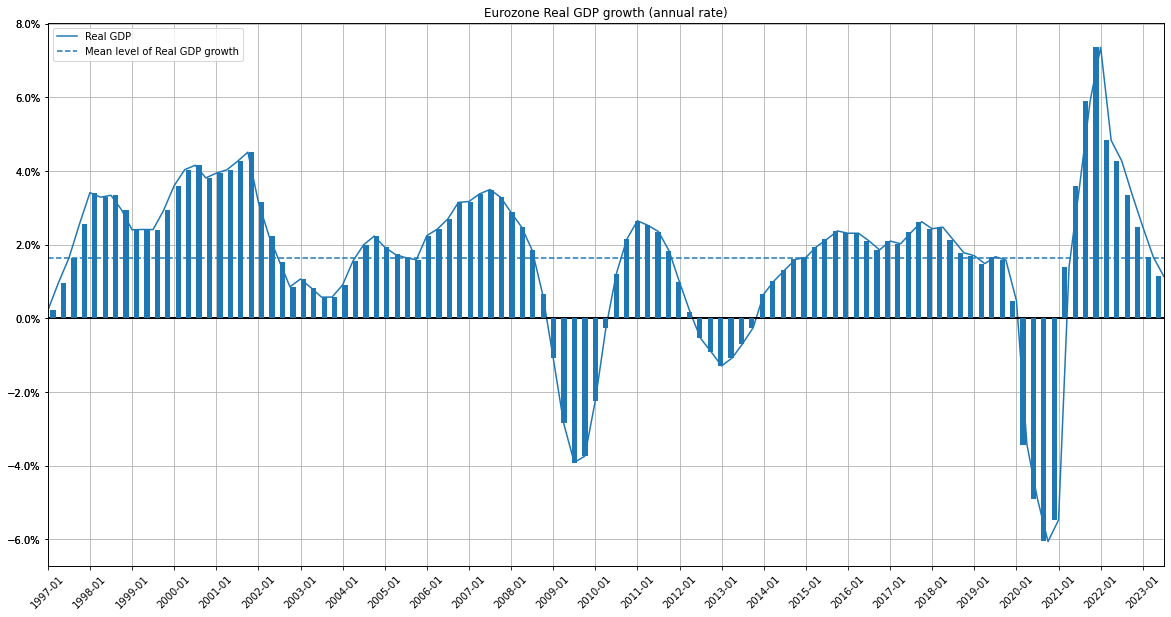

In [5]:
ax = real_gdp.iloc[:,0].plot(figsize=(20,10), grid=True, title='Eurozone Real GDP growth (annual rate)',
                   xticks=real_gdp.index[::4], xlabel='', rot=45)#, yticks=np.arange(-.15, .2, 0.025))
ax.axhline(y=0, lw=2, c='k')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2 = ax.twiny()
real_gdp.iloc[:,0].plot.bar(ax=ax2, xlabel='', legend=False)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.axhline(y=real_gdp.iloc[:,0].mean(), ls='--', c='#1f77b4', label='Mean level of Real GDP growth')
ax.legend()
ax2.xaxis.set_major_locator(mtick.NullLocator())
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, real_gdp.index[::4])))

In [6]:
print(f'Mean level of annual rate of real GDP growth in the Euro area since {real_gdp.index[0]:%Y-%m-%d}: '
      f'{real_gdp.iloc[:,0].mean():.2%}')

Mean level of annual rate of real GDP growth in the Euro area since 1997-01-01: 1.63%


## Composition of Euro Area GDP
In this section of the notebook I look at the real value added (represents the sum of the costs-incurred and the incomes-earned in production, and consists of compensation of employees, taxes on production and imports, less subsidies, and gross operating surplus) for each constituent industry of Euro Area GDP and how it changed over the past 5 and 10 years. In other words I break down real GDP growth over a given timeframe into growth of individual industries.

I use chained linked volumes (2010) as the unit of real measure of GDP and seasonally and calendar adjusted series.

In [7]:
gdp_components = eurostat.get_data_df('namq_10_a10', filter_pars={
    'startPeriod': report_start, 'unit': 'CLV10_MEUR', 's_adj': 'SCA',
    'nace_r2': ['A', 'B-E', 'C', 'F', 'G-I', 'J', 'K', 'L', 'M_N', 'O-Q', 'R-U', 'TOTAL'], 'geo': 'EA'}).iloc[:, 5:]
gdp_components = gdp_components.set_index(gdp_components.columns[0]).T
gdp_components = gdp_components.set_axis(pd.DatetimeIndex(gdp_components.index, 'QS')).dropna()
gdp_components.columns.names = [None]

Eurostat distinguishes [the following economic activities](https://ec.europa.eu/eurostat/databrowser/view/namq_10_a10__custom_9974547/default/table?lang=en):
* Agriculture, forestry and fishing
* Industry (except construction)
* Manufacturing
* Construction
* Wholesale and retail trade, transport, accommodation and food service activities
* Information and communication
* Financial and insurance activities
* Real estate activities
* Professional, scientific and technical activities; administrative and support service activities
* Public administration, defence, education, human health and social work activities
* Arts, entertainment and recreation; other service activities; activities of household and extra-territorial organizations and bodies

For brevity's sake I use shortened names of the activities in the rest of this notebook for better display.

In [8]:
gdp_components.columns = ['Agriculture, forestry and fishing', 'Industry (except construction)', 'Manufacturing',
                          'Construction', 'Wholesale and retail trade, transport...',
                          'Information and communication', 'Financial and insurance activities',
                          'Real estate activities',
                          'Professional, scientific and technical activities...',
                          'Public administration, defence, education...',
                          'Arts, entertainment and recreation...', 'Total']

gdp_total = gdp_components.iloc[:,-1]
gdp_components = gdp_components.iloc[:,:-1]

In [9]:
GRAPH_TITLE_GDP_COMPONENTS = 'Composition of Eurozone GDP By Value Added'
GRAPH_TITLE_GDP_COMPONENTS_PCT_CHG = 'Percentage Change in Value Added by Each Component of Eurozone GDP'

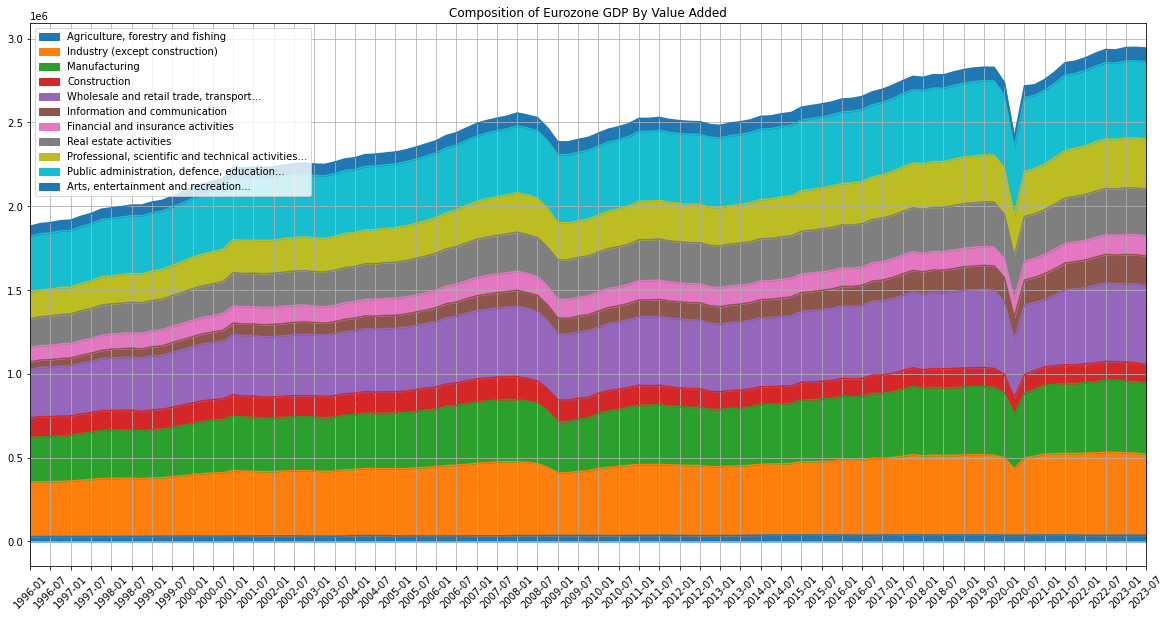

In [10]:
ax = gdp_components.plot.area(figsize=(20,10), grid=True, title=GRAPH_TITLE_GDP_COMPONENTS,
                              xticks=gdp_components.index[::2], xlabel='', rot=45)
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, gdp_components.index[::2])))

In [11]:
# Converting to percentages by dividing by total
gdp_components_pct = gdp_components.divide(gdp_components.sum(axis=1), axis=0)

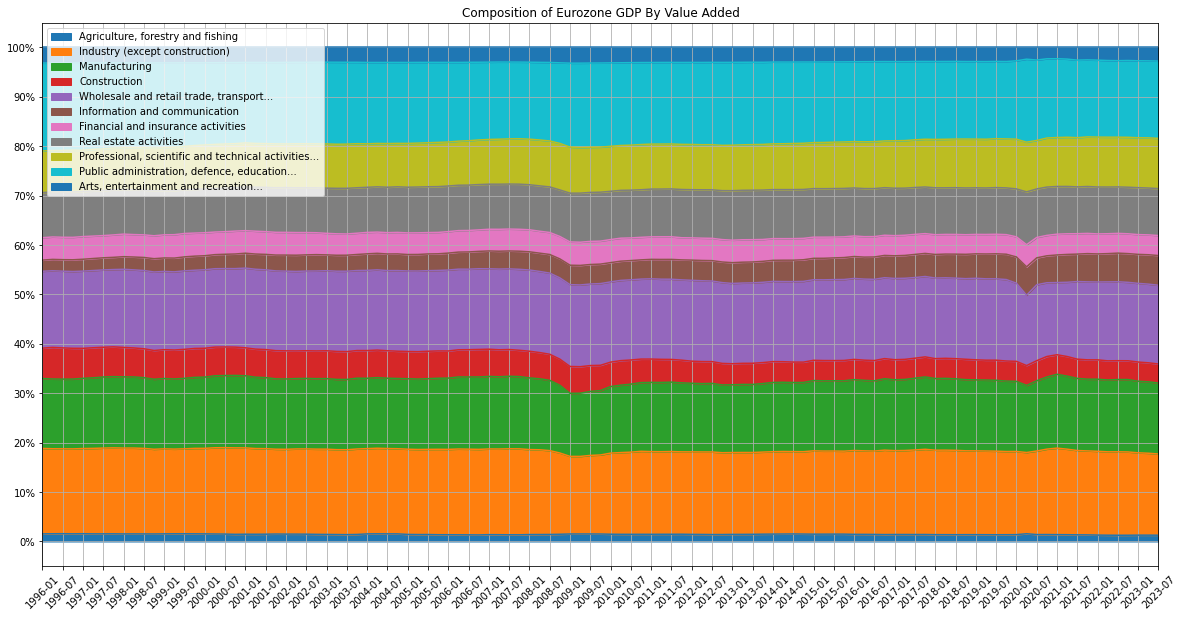

In [12]:
ax = gdp_components_pct.plot.area(figsize=(20,10), grid=True, title=GRAPH_TITLE_GDP_COMPONENTS,
                              xticks=gdp_components_pct.index[::2], xlabel='', rot=45,
                              yticks=np.arange(0, 1.01, .1))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.legend(loc='upper left')
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, gdp_components_pct.index[::2])))

In [13]:
gdp_components_pct.iloc[-1,:].sort_values(ascending=False)

Industry (except construction)                          0.164357
Wholesale and retail trade, transport...                0.159375
Public administration, defence, education...            0.156378
Manufacturing                                           0.143608
Professional, scientific and technical activities...    0.101647
Real estate activities                                  0.095023
Information and communication                           0.060153
Financial and insurance activities                      0.040425
Construction                                            0.038452
Arts, entertainment and recreation...                   0.027847
Agriculture, forestry and fishing                       0.012734
Name: 2023-07-01 00:00:00, dtype: object

**Conclusion 1**:

The 
* Industry (except construction),
* Wholesale and retail trade, transport, accommodation and food service activities
* Public administration, defence, education, human health and social work activities
* Manufecturing
* Professional, scientific and technical activities; administrative and support service activities

industries contributed the most (>10%) value added to Eurozone GDP as of the most recent quarter.

### Percentage Changes in Value Added by Each Industry of Euro Area GDP
It's interesting to analyze how much each industry contributed to the overall Real GDP growth over a number of years. This lets us see which industry are growing the most. I compare cumulative GDP growth over the last 4 quarters (which gives annual growth) with that 5 and 10 years ago. This is more accurate than comparing the output in a given quarter with that same quarter 5 and 10 years ago.

The way I break down overall Real GDP percentage change over a period into those of indivudual industries so that they all sum up to the same number is by using the following formula. If X = Y + Z, then:

 percentage change of $X = {X_2 - X_1 \over X_1} = {Y_2 + Z_2 - Y_1 - Z_1 \over Y_1 + Z_1} = {Y_2 - Y_1  \over Y_1 + Z_1} + {Z_2 - Z_1 \over Y_1 + Z_1}$

I will limit analysis to changes over 5 and 10 years. If you want to analyze different intervals, just edit the `periods` variable in the below cell.

In [14]:
periods = [10, 5]

First let's see by how much the total Real GDP has changed over the specified periods in percentage points.

In [15]:
gdp_total_pct_chg = pd.DataFrame([gdp_total.rolling(4).sum().pct_change(4*period).iloc[-1] for period in periods], 
                                 index=['Over past {:d} years'.format(period) for period in periods],
                                 columns=['Percentage Change'])
gdp_total_pct_chg

,Percentage Change
Over past 10 years,0.166189
Over past 5 years,0.056994


Now I break down these overall Real GDP percentacge changes into percentage changes in individual industries so that they sum up to the same real GDP percentage change number.

In [17]:
gdp_components_pct_chg = pd.concat(
    [((gdp_components.rolling(4).sum() - gdp_components.rolling(4).sum().shift(4*period)).divide(
        gdp_total.rolling(4).sum().shift(4*period), axis=0)).iloc[-1] for period in periods], axis=1)
gdp_components_pct_chg.columns = ['Over past {:d} years'.format(period) for period in periods]

In [18]:
gdp_components_pct_chg.sort_values(by=gdp_components_pct_chg.columns[0], inplace=True)

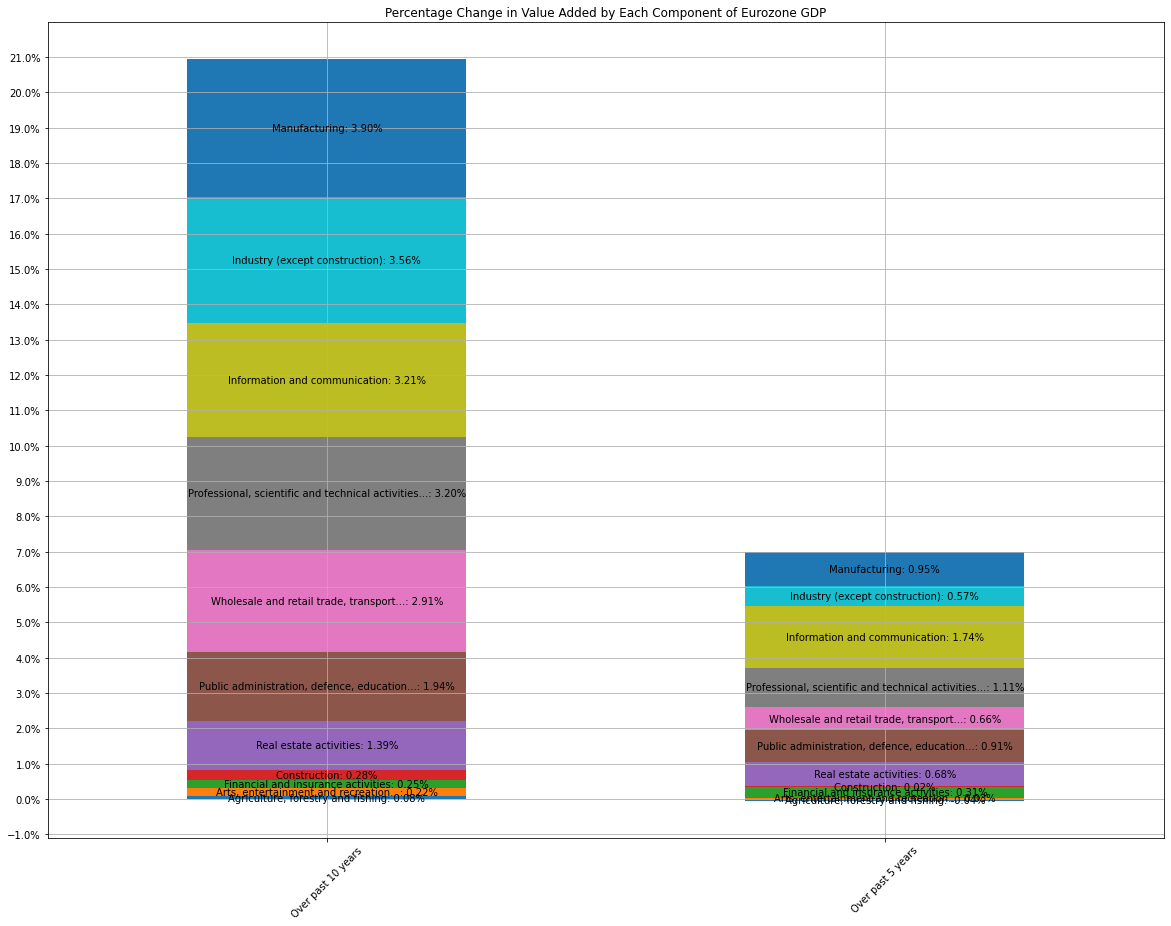

In [19]:
ax = gdp_components_pct_chg.T.plot.bar(figsize=(20,15), grid=True, title=GRAPH_TITLE_GDP_COMPONENTS_PCT_CHG,
                                       stacked=True, rot=45, yticks=np.arange(-.01, 0.211, .01))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.get_legend().remove()
for c in ax.containers:
    ax.bar_label(c, fmt=c.get_label() + ': {:.2%}', label_type='center')

**Conclusion 2**: The largest growing industries, as measured by their real value added contributon to the overall GDP growth, are:
* Manufacturing
* Information and communication
* Industry (except construction)
* Professional, scientific and technical activities; administrative and support service activities
* Wholesale and retail trade, transport, accommodation and food service activities

Of these industries:
* Manufacturing 
* Professional, scientific and technical activities; administrative and support service activities
* Wholesale and retail trade, transport, accommodation and food service activities
are also in the Top-5 biggest contributoes to the Eurozone GDP (see Conclusion 1 above).

Let's compare the top-5 growing industries over the past 5 and 10 years.

In [19]:
gdp_components_pct_chg.sort_values(by=gdp_components_pct_chg.columns[0], ascending=False).iloc[:5,:1]

,Over past 10 years
Manufacturing,0.036042
Information and communication,0.03298
Industry (except construction),0.032119
"Professional, scientific and technical activities...",0.03161
"Wholesale and retail trade, transport...",0.028655


In [23]:
gdp_components_pct_chg.sort_values(by=gdp_components_pct_chg.columns[1], ascending=False).iloc[:9,1:]

,Over past 5 years
Information and communication,0.017605
"Professional, scientific and technical activities...",0.010615
"Public administration, defence, education...",0.009705
Manufacturing,0.008397
Real estate activities,0.006915
"Wholesale and retail trade, transport...",0.006594
Industry (except construction),0.00359
Financial and insurance activities,0.003344
"Arts, entertainment and recreation...",0.001074


**Conclusion 3**: Over the past 5 years `Public administration, defence, education, human health and social work activities` and `Real estate activities` industry groups supplanted `Industry (except construction)` and `Wholesale and retail trade, transport, accommodation and food service activities` in the list of the top-5 largest contributors to Eurozone GDP growth.